## Modelos para la detección de Lesión Renal Aguda Postoperatoria

### Librerías

In [22]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [23]:
#Clonar repositorio
!git clone https://github.com/danielfce01/Monografia.git

fatal: destination path 'Monografia' already exists and is not an empty directory.


### Conjuntos de datos

#### df_aki

Conjunto de datos del trabajo original :

Incidencia y factores de riesgo de Lesión Renal Aguda en cirugía no cardiovascular en un Hospital Universitario de Medellín, Colombia

Contiene 488 registros

Problema : marcado desbalance en la variable target lra (lesion renal aguda)

In [24]:
df_aki = pd.read_excel('/content/Monografia/data_final_balanceada.xlsx')
df_aki.head()

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,3,0,0.76,0,0,0,0,0
1,71,1,1,0,3,0,0.82,1,0,0,0,0
2,66,1,1,1,3,0,0.69,0,1,0,1,1
3,42,0,0,0,1,0,0.69,0,0,0,1,0
4,88,1,1,0,3,0,0.83,0,0,0,0,0


In [25]:
df_aki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      489 non-null    int64  
 1   dm                        489 non-null    int64  
 2   hta                       489 non-null    int64  
 3   ieca                      489 non-null    int64  
 4   asa                       489 non-null    int64  
 5   enfermedad_renal_cronica  489 non-null    int64  
 6   creatinina_basal          489 non-null    float64
 7   sepsis                    489 non-null    int64  
 8   choque_hipovolemico_      489 non-null    int64  
 9   cirugia_vascular          489 non-null    int64  
 10  prioridad_urgente         489 non-null    int64  
 11  lra                       489 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 46.0 KB


In [26]:
print(df_aki['lra'].value_counts())

lra
0    395
1     94
Name: count, dtype: int64


In [27]:
df_aki['asa'] = df_aki['asa'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})
display(df_aki.head())

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,1,0,0.76,0,0,0,0,0
1,71,1,1,0,1,0,0.82,1,0,0,0,0
2,66,1,1,1,1,0,0.69,0,1,0,1,1
3,42,0,0,0,0,0,0.69,0,0,0,1,0
4,88,1,1,0,1,0,0.83,0,0,0,0,0


####df_mimic


In [28]:
df_mimic = pd.read_csv('/content/Monografia/1710 ap_aki_features.csv')
df_mimic.head()

,subject_id,hadm_id,stay_id,intime,outtime,edad,gender,race,admission_type,insurance,...,aki_scr_stage,aki_uo,aki_7d,glucose_mean_24h,urine_24h_ml,intake_24h_ml,output_24h_ml,balance_hidrico_24h_ml,peso_kg,balance_hidrico_24h_mlkg
0,10004606,29242151,30213599,2159-02-20 16:10:03,2159-02-25 20:09:14,64,F,WHITE,OBSERVATION ADMIT,Other,...,NaN,0,0,131.000000,NaN,5851.571321,2215.0,3636.571321,NaN,NaN
1,10007795,28477357,31921355,2136-04-22 18:01:13,2136-04-23 19:13:58,53,F,WHITE,URGENT,Medicare,...,3.0,0,1,133.000000,NaN,2492.500023,5900.0,-3407.499977,NaN,NaN
2,10012206,23961896,37675714,2127-07-04 02:08:00,2127-07-04 15:52:22,45,M,WHITE,OBSERVATION ADMIT,Other,...,NaN,0,0,108.000000,NaN,2417.583356,1525.0,892.583356,NaN,NaN
3,10017531,21095812,32136798,2159-12-26 20:14:53,2160-02-04 16:23:00,64,M,WHITE,URGENT,Other,...,3.0,0,1,207.666667,NaN,2948.151587,745.0,2203.151587,NaN,NaN
4,10017531,22580355,35526828,2159-09-22 19:30:55,2159-10-24 14:57:16,64,M,WHITE,URGENT,Other,...,1.0,0,1,202.333333,NaN,10595.584131,1295.0,9300.584131,NaN,NaN


In [29]:
df_mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   subject_id                1069 non-null   int64  
 1   hadm_id                   1069 non-null   int64  
 2   stay_id                   1069 non-null   int64  
 3   intime                    1069 non-null   object 
 4   outtime                   1069 non-null   object 
 5   edad                      1069 non-null   int64  
 6   gender                    1069 non-null   object 
 7   race                      1069 non-null   object 
 8   admission_type            1069 non-null   object 
 9   insurance                 1069 non-null   object 
 10  first_careunit            1069 non-null   object 
 11  dm                        1069 non-null   int64  
 12  hta                       1069 non-null   int64  
 13  enfermedad_renal_cronica  1069 non-null   int64  
 14  sepsis  

In [30]:
df_mimic = df_mimic[['edad', 'dm', 'hta', 'enfermedad_renal_cronica', 'sepsis', 'choque_hipovolemico_', 'ieca', 'asa', 'creatinina_basal', 'aki_7d']]
df_mimic = df_mimic.rename(columns={'aki_7d': 'lra'})
display(df_mimic.head())

,edad,dm,hta,enfermedad_renal_cronica,sepsis,choque_hipovolemico_,ieca,asa,creatinina_basal,lra
0,64,0,1,0,0,0,1,0,1.3,0
1,53,0,1,0,0,0,0,0,0.6,1
2,45,1,1,0,0,0,0,0,1.7,0
3,64,1,1,0,0,0,0,1,1.2,1
4,64,1,1,0,0,0,0,0,1.7,1


In [31]:
# Imputar valores faltantes en creatinina_basal con la media
df_mimic["creatinina_basal"].fillna(df_mimic["creatinina_basal"].mean(), inplace=True)

/tmp/ipython-input-2185084524.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mimic["creatinina_basal"].fillna(df_mimic["creatinina_basal"].mean(), inplace=True)


In [32]:
df_mimic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069 entries, 0 to 1068
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1069 non-null   int64  
 1   dm                        1069 non-null   int64  
 2   hta                       1069 non-null   int64  
 3   enfermedad_renal_cronica  1069 non-null   int64  
 4   sepsis                    1069 non-null   int64  
 5   choque_hipovolemico_      1069 non-null   int64  
 6   ieca                      1069 non-null   int64  
 7   asa                       1069 non-null   int64  
 8   creatinina_basal          1069 non-null   float64
 9   lra                       1069 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 83.6 KB


In [33]:
print(df_mimic['lra'].value_counts())

lra
1    580
0    489
Name: count, dtype: int64


####df_udaki

In [34]:
df_mimic_2 = df_mimic.copy()

In [35]:
df_mimic_2['cirugia_vascular'] = 0
df_mimic_2['prioridad_urgente'] = 0

In [36]:
df_udaki = pd.concat([df_aki, df_mimic_2])
df_udaki.head()

,edad,dm,hta,ieca,asa,enfermedad_renal_cronica,creatinina_basal,sepsis,choque_hipovolemico_,cirugia_vascular,prioridad_urgente,lra
0,75,0,0,0,1,0,0.76,0,0,0,0,0
1,71,1,1,0,1,0,0.82,1,0,0,0,0
2,66,1,1,1,1,0,0.69,0,1,0,1,1
3,42,0,0,0,0,0,0.69,0,0,0,1,0
4,88,1,1,0,1,0,0.83,0,0,0,0,0


In [37]:
df_udaki.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1558 entries, 0 to 1068
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1558 non-null   int64  
 1   dm                        1558 non-null   int64  
 2   hta                       1558 non-null   int64  
 3   ieca                      1558 non-null   int64  
 4   asa                       1558 non-null   int64  
 5   enfermedad_renal_cronica  1558 non-null   int64  
 6   creatinina_basal          1558 non-null   float64
 7   sepsis                    1558 non-null   int64  
 8   choque_hipovolemico_      1558 non-null   int64  
 9   cirugia_vascular          1558 non-null   int64  
 10  prioridad_urgente         1558 non-null   int64  
 11  lra                       1558 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 158.2 KB


In [38]:
print(df_udaki['lra'].value_counts())

lra
0    884
1    674
Name: count, dtype: int64


##Modelos con los diferentes conjuntos de datos

### Regresión Logística

####Regresión df_aki

MATRIZ DE CONFUSIÓN:
[[90 29]
 [10 18]]

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       119
           1       0.38      0.64      0.48        28

    accuracy                           0.73       147
   macro avg       0.64      0.70      0.65       147
weighted avg       0.80      0.73      0.76       147

ROC-AUC: 0.768607442977191


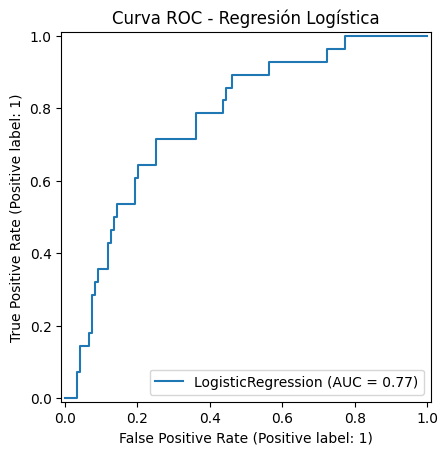

In [39]:
#Variables predictoras y objetivo
X_aki = df_aki.drop("lra", axis=1)
y_aki = df_aki["lra"]

#Dividir en entrenamiento y prueba
X_train_aki, X_test_aki, y_train_aki, y_test_aki = train_test_split(
    X_aki, y_aki, test_size=0.3, random_state=42, stratify=y_aki
)


#Escalamiento (normalización)
scaler = StandardScaler()
X_train_scaled_aki = scaler.fit_transform(X_train_aki)
X_test_scaled_aki = scaler.transform(X_test_aki)

#Entrenar Modelo
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled_aki, y_train_aki)

#Evaluar Modelo
y_pred_aki = logreg.predict(X_test_scaled_aki)
y_prob_aki = logreg.predict_proba(X_test_scaled_aki)[:, 1]

print("MATRIZ DE CONFUSIÓN:")
print(confusion_matrix(y_test_aki, y_pred_aki))
print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_aki, y_pred_aki))
print("ROC-AUC:", roc_auc_score(y_test_aki, y_prob_aki))

# Curva ROC
RocCurveDisplay.from_estimator(logreg, X_test_scaled_aki, y_test_aki)
plt.title("Curva ROC - Regresión Logística")
plt.show()

####Regresión df_mimic

MATRIZ DE CONFUSIÓN:
[[113  34]
 [ 90  84]]

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.56      0.77      0.65       147
           1       0.71      0.48      0.58       174

    accuracy                           0.61       321
   macro avg       0.63      0.63      0.61       321
weighted avg       0.64      0.61      0.61       321

ROC-AUC: 0.6693447493940106


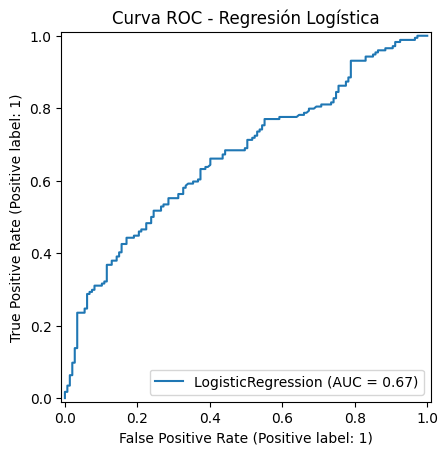

In [40]:
#Variables predictoras y objetivo
X_mimic = df_mimic.drop("lra", axis=1)
y_mimic = df_mimic["lra"]

#Dividir en entrenamiento y prueba
X_train_mimic, X_test_mimic, y_train_mimic, y_test_mimic = train_test_split(
    X_mimic, y_mimic, test_size=0.3, random_state=42, stratify=y_mimic
)


#Escalamiento (normalización)
scaler = StandardScaler()
X_train_scaled_mimic = scaler.fit_transform(X_train_mimic)
X_test_scaled_mimic = scaler.transform(X_test_mimic)

#Entrenar Modelo
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled_mimic, y_train_mimic)

#Evaluar Modelo
y_pred = logreg.predict(X_test_scaled_mimic)
y_prob = logreg.predict_proba(X_test_scaled_mimic)[:, 1]

print("MATRIZ DE CONFUSIÓN:")
print(confusion_matrix(y_test_mimic, y_pred))
print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_mimic, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_mimic, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(logreg, X_test_scaled_mimic, y_test_mimic)
plt.title("Curva ROC - Regresión Logística")
plt.show()

####Regresión df_udaki

MATRIZ DE CONFUSIÓN:
[[172  94]
 [ 90 112]]

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       266
           1       0.54      0.55      0.55       202

    accuracy                           0.61       468
   macro avg       0.60      0.60      0.60       468
weighted avg       0.61      0.61      0.61       468

ROC-AUC: 0.6752028586317278


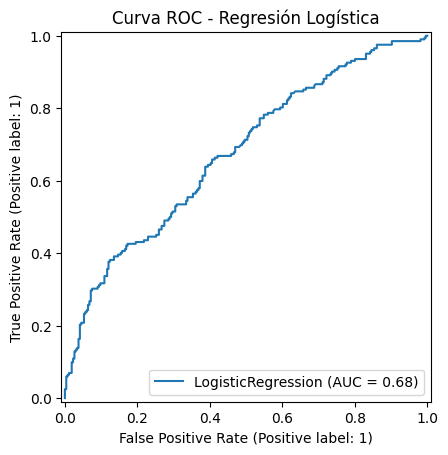

In [41]:
#Variables predictoras y objetivo
X_udaki = df_udaki.drop("lra", axis=1)
y_udaki= df_udaki["lra"]

#Dividir en entrenamiento y prueba
X_train_udaki, X_test_udaki, y_train_udaki, y_test_udaki = train_test_split(
    X_udaki, y_udaki, test_size=0.3, random_state=42, stratify=y_udaki
)


#Escalamiento (normalización)
scaler = StandardScaler()
X_train_scaled_udaki = scaler.fit_transform(X_train_udaki)
X_test_scaled_udaki = scaler.transform(X_test_udaki)

#Entrenar Modelo
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')
logreg.fit(X_train_scaled_udaki, y_train_udaki)

#Evaluar Modelo
y_pred = logreg.predict(X_test_scaled_udaki)
y_prob = logreg.predict_proba(X_test_scaled_udaki)[:, 1]

print("MATRIZ DE CONFUSIÓN:")
print(confusion_matrix(y_test_udaki, y_pred))
print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_udaki, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_udaki, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(logreg, X_test_scaled_udaki, y_test_udaki)
plt.title("Curva ROC - Regresión Logística")
plt.show()

**Resumen de los resultados**

In [42]:
# Extract metrics from previous logistic regression runs
results_aki = {
    'Dataset': 'df_aki',
    'ROC-AUC': 0.7686,
    'Accuracy': 0.73,
    'Precision (Class 1)': 0.38,
    'Recall (Class 1)': 0.64,
    'F1-Score (Class 1)': 0.48
}

results_mimic = {
    'Dataset': 'df_mimic',
    'ROC-AUC': 0.6693,
    'Accuracy': 0.61,
    'Precision (Class 1)': 0.71,
    'Recall (Class 1)': 0.48,
    'F1-Score (Class 1)': 0.58
}

results_udaki = {
    'Dataset': 'df_udaki',
    'ROC-AUC': 0.6752,
    'Accuracy': 0.61,
    'Precision (Class 1)': 0.54,
    'Recall (Class 1)': 0.55,
    'F1-Score (Class 1)': 0.55
}

# Create a DataFrame from the results
summary_df = pd.DataFrame([results_aki, results_mimic, results_udaki])

# Display the summary table
print("Tabla resumen de resultados de Regresión Logística:")
display(summary_df)

Tabla resumen de resultados de Regresión Logística:


,Dataset,ROC-AUC,Accuracy,Precision (Class 1),Recall (Class 1),F1-Score (Class 1)
0,df_aki,0.7686,0.73,0.38,0.64,0.48
1,df_mimic,0.6693,0.61,0.71,0.48,0.58
2,df_udaki,0.6752,0.61,0.54,0.55,0.55


**Analisis**

**Desempeño General (ROC-AUC)**

df_aki (0.7686): Mejor capacidad discriminativa general

df_udaki (0.6752) y df_mimic (0.6693): Desempeño similar pero inferior

**Balance entre Precisión y Recall**

df_aki: Alto recall (0.64) pero baja precisión (0.38)

Detecta bien los casos reales de lesión renal

Muchos falsos positivos

el modelo es más sensible que específico, lo cual en un contexto clínico puede ser aceptable (prefiere “alertar” más casos de LRA aunque algunos sean falsos).

útil: Cuando el costo de no detectar una lesión renal es muy alto

df_mimic: Alta precisión (0.71) pero recall moderado (0.48)

Cuando predice lesión renal, suele acertar

Se le escapan muchos casos reales

predice positivos con mayor certeza, pero se le escapan muchos casos (riesgo de falsos negativos).

df_udaki: Balance más equilibrado (Precisión: 0.54, Recall: 0.55)

El modelo combinado df_udaki ofrece un balance, pero no supera a los individuales

**Modelo  UDAKI con hiperparametros y validacion cruzada**

Librerias

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_validate,
    GridSearchCV,
    learning_curve
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    f1_score,
    make_scorer,
    brier_score_loss,
    log_loss
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.feature_selection import RFECV, SelectKBest, chi2
from sklearn.pipeline import Pipeline

# Para gráficos más elaborados
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


**Modelo**

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Mejores hiperparámetros:
  C: 0.001
  class_weight: None
  max_iter: 1000
  penalty: l2
  solver: liblinear

Mejor ROC-AUC (CV): 0.7004

--------------------------------------------------------------------------------
VALIDACIÓN CRUZADA DETALLADA (5-FOLD)
--------------------------------------------------------------------------------

Resultados de Validación Cruzada:
Métrica         Media      Std        Min        Max       
-------------------------------------------------------
roc_auc         0.7004     0.0243     0.6574     0.7218    
accuracy        0.6477     0.0073     0.6376     0.6560    
precision       0.6579     0.0162     0.6290     0.6731    
recall          0.3899     0.0234     0.3579     0.4149    
f1              0.4890     0.0172     0.4626     0.5098    
MATRIZ DE CONFUSIÓN:
[[210  56]
 [117  85]]

 REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.6

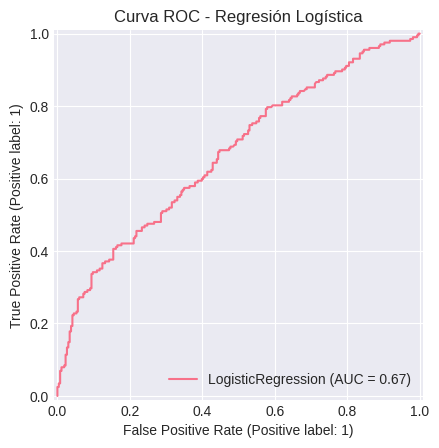

In [49]:
#Variables predictoras y objetivo
X_udaki = df_udaki.drop("lra", axis=1)
y_udaki= df_udaki["lra"]

#Dividir en entrenamiento y prueba
X_train_udaki, X_test_udaki, y_train_udaki, y_test_udaki = train_test_split(
    X_udaki, y_udaki, test_size=0.3, random_state=42, stratify=y_udaki
)

#Escalamiento (normalización)
scaler = StandardScaler()
X_train_scaled_udaki = scaler.fit_transform(X_train_udaki)
X_test_scaled_udaki = scaler.transform(X_test_udaki)

param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularización
        'penalty': ['l1', 'l2'],  # Tipo de regularización
        'solver': ['liblinear', 'saga'],  # Solvers compatibles con l1 y l2
        'class_weight': ['balanced', None],  # Manejo de desbalance
        'max_iter': [1000]
    }

#Modelo
logreg = LogisticRegression(random_state=42)

# Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
        estimator=logreg,
        param_grid=param_grid,
        cv=cv,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
#Entrenar el modelo
grid_search.fit(X_train_scaled_udaki, y_train_udaki)

print(f"\nMejores hiperparámetros:")
for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
print(f"\nMejor ROC-AUC (CV): {grid_search.best_score_:.4f}")

print("\n" + "-"*80)
print("VALIDACIÓN CRUZADA DETALLADA (5-FOLD)")
print("-"*80)

best_model = grid_search.best_estimator_

# Scoring múltiple
scoring = {
        'roc_auc': 'roc_auc',
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1'
    }

cv_results = cross_validate(
        best_model, X_train_scaled_udaki, y_train_udaki,
        cv=cv,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )

print("\nResultados de Validación Cruzada:")
print(f"{'Métrica':<15} {'Media':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
print("-" * 55)

for metric in ['roc_auc', 'accuracy', 'precision', 'recall', 'f1']:
    test_scores = cv_results[f'test_{metric}']
    print(f"{metric:<15} {np.mean(test_scores):<10.4f} "
          f"{np.std(test_scores):<10.4f} "
          f"{np.min(test_scores):<10.4f} "
          f"{np.max(test_scores):<10.4f}")

#Evaluar Modelo
y_pred = best_model.predict(X_test_scaled_udaki)
y_prob = best_model.predict_proba(X_test_scaled_udaki)[:, 1]

print("MATRIZ DE CONFUSIÓN:")
print(confusion_matrix(y_test_udaki, y_pred))
print("\n REPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test_udaki, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_udaki, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(best_model, X_test_scaled_udaki, y_test_udaki)
plt.title("Curva ROC - Regresión Logística")
plt.show()

**Analisis**

Hiperparámetros Seleccionados:

C = 0.001: Valor muy bajo, indica fuerte regularización

penalty = l2: Regularización Ridge

class_weight = None: No se ajustaron pesos de clases

el modelo tiende al sobreajuste y necesita regularización fuerte

**Mejoras**

Mejora en ROC-AUC: 0.7004 vs 0.6752 (incremento del 3.7%)

Precisión mejorada: 65.8% vs 54% (mejora significativa)

Menos falsos positivos: Mejor especificidad

**Problemas**

Recall Críticamente Bajo (38.99%)

Solo detecta el 39% de los casos reales de lesión renal

117 falsos negativos - pacientes con lesión renal no detectados

El modelo optimizado con Grid Search logra estabilidad y precisión moderada, pero sacrifica sensibilidad,